Import the necessary Libraries and the Dataset

In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the dataset
file_path = "C:/Users/James Ga-as/Downloads/dinosaurs.csv"
dinosaurs_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dinosaurs_df.head(5)

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae


In [37]:
# Get more information about the dataset
dinosaurs_df.info()
dinosaurs_df.describe()
dinosaurs_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

Although this dataset offers useful information. The dataset has gaps that may affect the data analysis. More study or data gathering to fill these gaps would improve the dataset's accuracy and provide deeper understanding of the traits of dinosaurs and their evolutionary background.

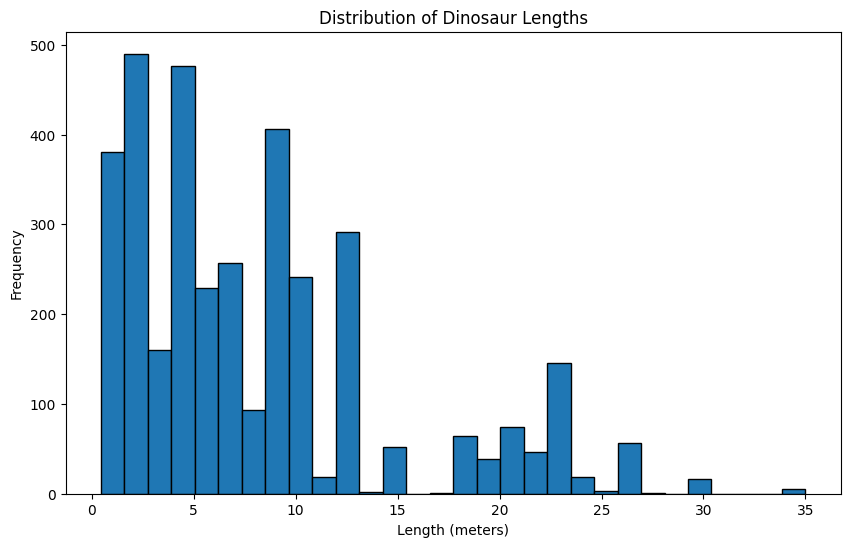

In [38]:
# 1. What is the distribution of dinosaur lengths?

plt.figure(figsize=(10, 6))
plt.hist(dinosaurs_df['length_m'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Dinosaur Lengths')
plt.xlabel('Length (meters)')
plt.ylabel('Frequency')
plt.show()


The distribution of dinosaur lengths shows a right-skewed distribution, it indicates that most dinosaurs is less than 20 meters long.

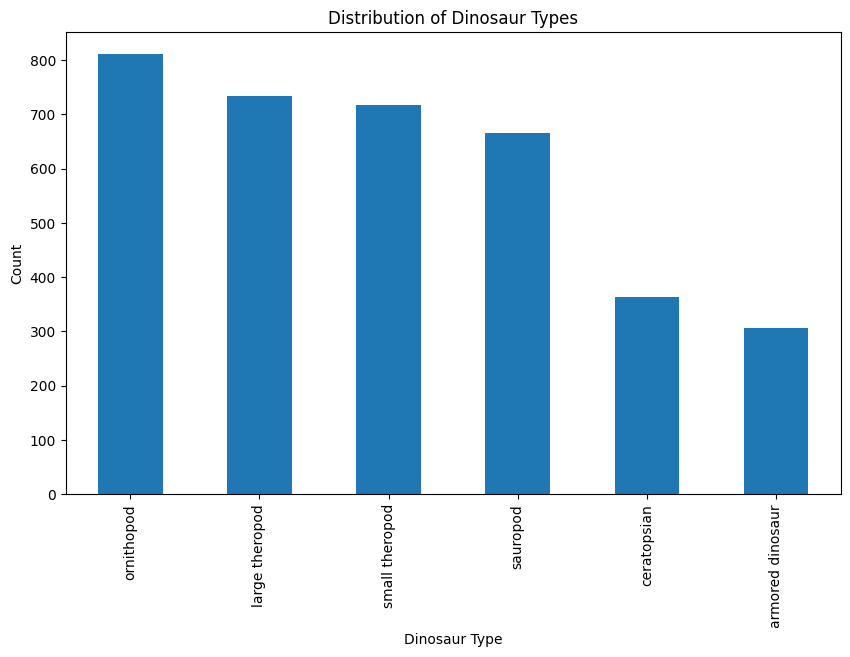

In [39]:
# 2. What is the distribution of dinosaur types?
plt.figure(figsize=(10, 6))
dinosaurs_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Dinosaur Types')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.show()

The distribution of dinosaur types indicates that Ornithopod the most common types found in the dataset.

C:\Users\James Ga-as\AppData\Local\Temp\ipykernel_12032\1124146484.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


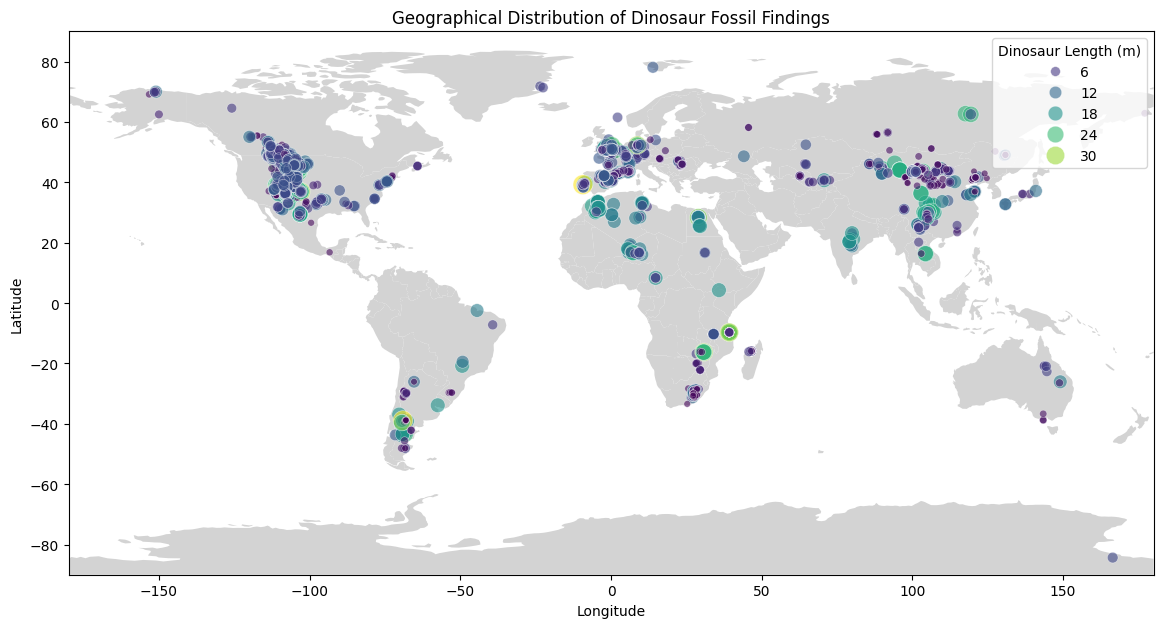

In [40]:
# 3. What is the geographical distribution of dinosaur fossil findings?

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=(14, 8))

# Plot the world map
world.plot(ax=plt.gca(), color='lightgrey')

# Use a scatter plot to visualize density
sns.scatterplot(
    x='lng', y='lat', 
    hue='length_m', size='length_m', 
    sizes=(20, 200), alpha=0.6, 
    palette='viridis', data=dinosaurs_df
)

plt.title('Geographical Distribution of Dinosaur Fossil Findings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)  
plt.ylim(-90, 90)    
plt.legend(title='Dinosaur Length (m)', loc='upper right')
plt.show()


<Figure size 1000x600 with 0 Axes>

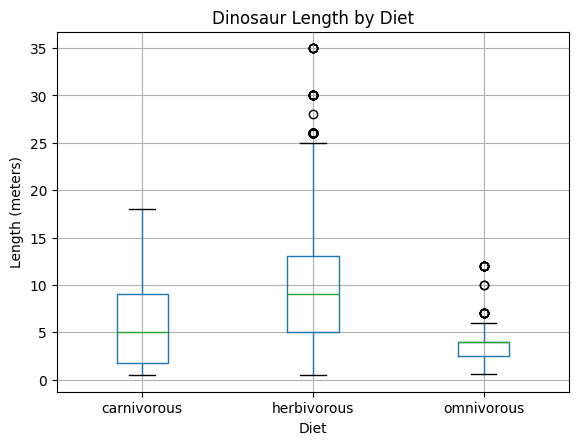

In [41]:
# 4. What is the relationship between dinosaur length and diet?
plt.figure(figsize=(10, 6))
dinosaurs_df.boxplot(column='length_m', by='diet')
plt.title('Dinosaur Length by Diet')
plt.suptitle('')
plt.xlabel('Diet')
plt.ylabel('Length (meters)')
plt.show()

The relationship between dinosaur length and diet shows that herbivorous dinosaurs tend to be longer on average and omnivorous dinosaurs tend to be smaller compared to carnivorous dinosaurs.

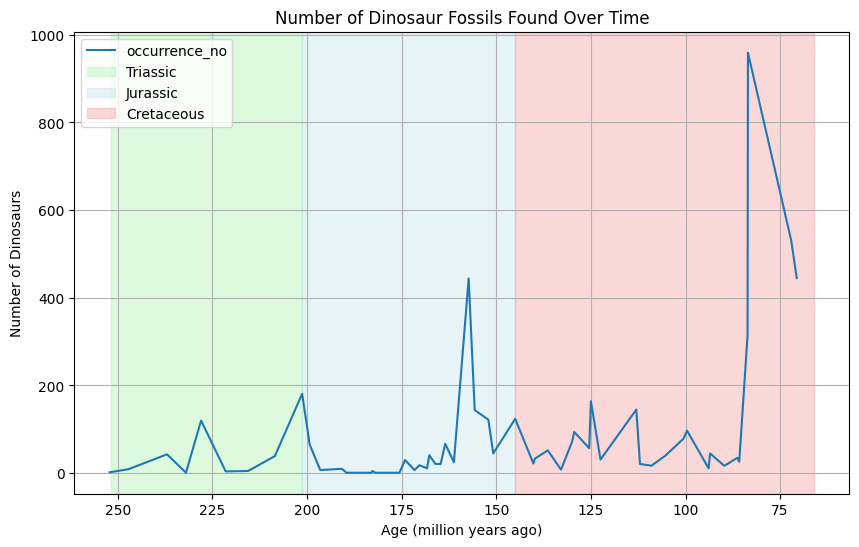

In [42]:
# 5. How did the number of dinosaurs found in each era change over time?
plt.figure(figsize=(10, 6))

# Plot the number of dinosaur fossils found over time
dinosaurs_df.groupby('max_ma')['occurrence_no'].count().plot()

# Filter out rows with missing length values
dinosaurs_non_missing_length = dinosaurs_df.dropna(subset=['length_m'])

# Highlight the background for each era
plt.axvspan(251.902, 201.3, color='lightgreen', alpha=0.3, label='Triassic')
plt.axvspan(201.3, 145, color='lightblue', alpha=0.3, label='Jurassic')
plt.axvspan(145, 66, color='lightcoral', alpha=0.3, label='Cretaceous')

# Titles and Labels
plt.title('Number of Dinosaur Fossils Found Over Time')
plt.xlabel('Age (million years ago)')
plt.ylabel('Number of Dinosaurs')

plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()







The number of dinosaurs found in each era shows a peak during the Jurassic and Cretaceous periods, indicating a better fossil record during these times compared to the fossil record found during Triassic.